In [118]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

In [119]:
df = pd.read_csv(r"C:\Users\stany\OneDrive\Desktop\Mushrooms\mushrooms.csv")
print(df)

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

In [120]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [121]:
#Check if there are any NAN values in the dataset

df.isnull().values.any()

False

In [122]:
for column in df:
    df[column] = pd.factorize(df[column])[0]
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,0,0,1,3,1,0,1,10,...,0,6,7,0,2,0,0,8,5,6
8120,1,0,0,0,1,3,1,0,1,10,...,0,6,7,0,1,0,0,8,3,6
8121,1,3,0,0,1,3,1,0,1,1,...,0,6,7,0,2,0,0,8,5,6
8122,0,4,1,0,1,6,0,0,0,8,...,3,0,0,0,0,0,1,4,3,6


In [123]:
col = 'veil-type'
df = df.loc[:, df.columns != col]

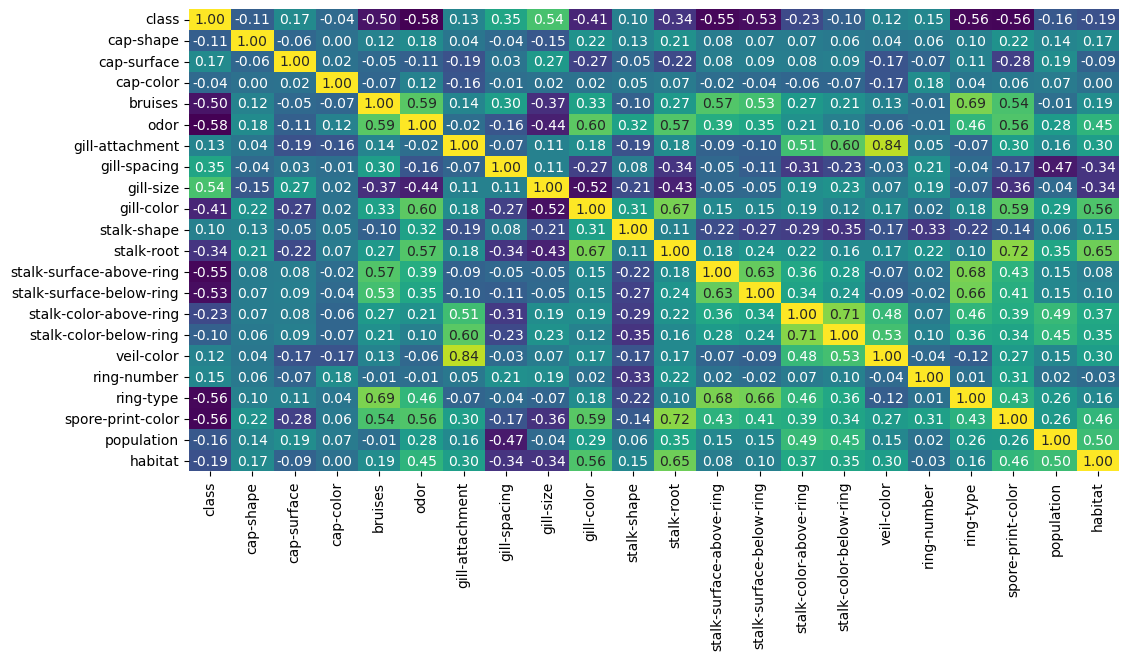

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap(), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)

In [125]:
from sklearn.model_selection import train_test_split
y = df['class']
col = 'class'
X = df.loc[:, df.columns != col]

rem_X, test_X, rem_y, test_y = train_test_split(X,y, test_size=0.1, random_state=42, shuffle=True)
train_X, valid_X, train_y, valid_y = train_test_split(rem_X, rem_y, test_size=0.2)

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
import pickle as pk
model = GradientBoostingClassifier(verbose=1).fit(train_X, train_y)

      Iter       Train Loss   Remaining Time 
         1           1.2036            0.40s
         2           1.0552            0.34s
         3           0.9316            0.36s
         4           0.8274            0.34s
         5           0.7384            0.36s
         6           0.6620            0.34s
         7           0.5957            0.33s
         8           0.5383            0.35s
         9           0.4877            0.34s
        10           0.4432            0.33s
        20           0.1900            0.26s
        30           0.0927            0.23s
        40           0.0502            0.19s
        50           0.0308            0.16s
        60           0.0210            0.13s
        70           0.0138            0.10s
        80           0.0096            0.07s
        90           0.0065            0.04s
       100           0.0044            0.00s


In [127]:
model.score(valid_X, valid_y)

1.0

In [128]:
model.score(test_X, test_y)

1.0

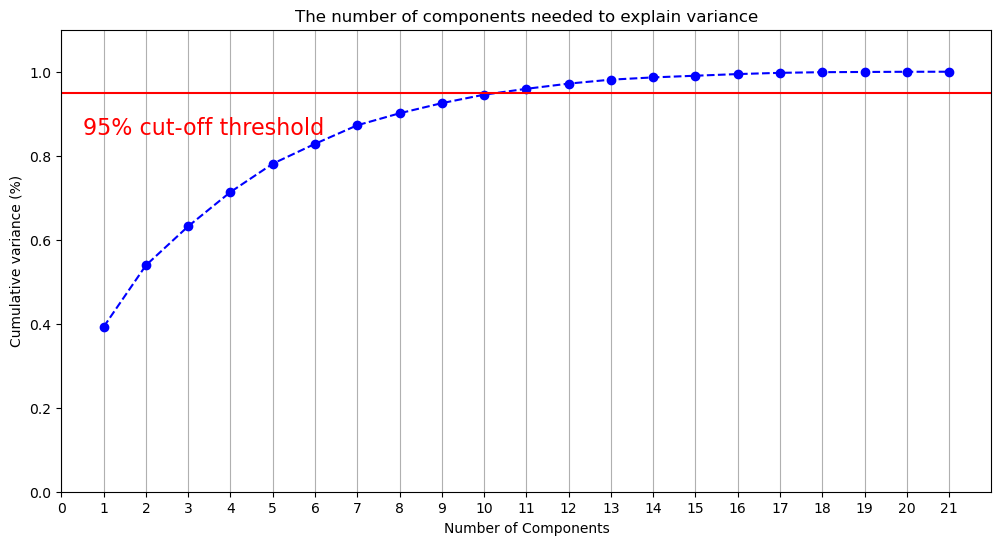

In [129]:
from sklearn.decomposition import PCA
pca = PCA().fit(valid_X, valid_y)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 22, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 22, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [140]:
(pca.explained_variance_ratio_)

array([3.92650809e-01, 1.46493156e-01, 9.28586459e-02, 8.15844263e-02,
       6.73889324e-02, 4.73412650e-02, 4.42237796e-02, 2.85103871e-02,
       2.41279905e-02, 2.02030309e-02, 1.39185610e-02, 1.23852362e-02,
       9.40886385e-03, 5.39802998e-03, 3.98069488e-03, 3.92842363e-03,
       2.95075650e-03, 1.55019589e-03, 5.20747644e-04, 4.47535108e-04,
       1.28533034e-04])

In [138]:
pca.feature_names_in_

array(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'], dtype=object)

In [131]:
from sklearn import datasets, metrics, model_selection, svm
metrics.plot_roc_curve(model, X_test, y_test) 
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

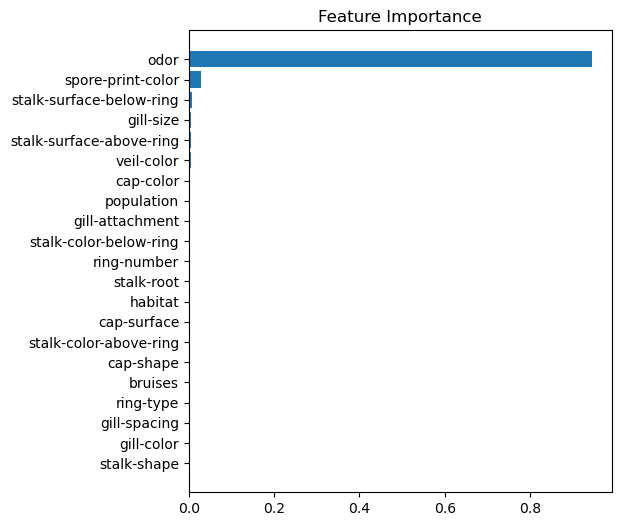

In [106]:
from sklearn.inspection import permutation_importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance")

result = permutation_importance(
    model, test_X, test_y, n_repeats=10, random_state=42, n_jobs=2
)

In [107]:
feature_importance

array([1.54199239e-04, 2.39357881e-04, 1.71304577e-03, 6.89777619e-05,
       9.44384122e-01, 7.95083317e-04, 8.69168447e-06, 5.78476826e-03,
       2.62169388e-15, 0.00000000e+00, 4.38632285e-04, 4.21147802e-03,
       6.80734376e-03, 1.74261079e-04, 7.60335293e-04, 3.72639844e-03,
       6.40037402e-04, 5.99016020e-05, 2.86311530e-02, 1.09400747e-03,
       3.08205466e-04])

In [108]:
col = 'odor'
new_df = df.loc[:, df.columns != col]
y = df['class']
col = 'class'
X = new_df.loc[:, new_df.columns != col]

rem_X, test_X, rem_y, test_y = train_test_split(X,y, test_size=0.1, random_state=42, shuffle=True)
train_X, valid_X, train_y, valid_y = train_test_split(rem_X, rem_y, test_size=0.2)

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
import pickle as pk
model = GradientBoostingClassifier(verbose=1).fit(train_X, train_y)

      Iter       Train Loss   Remaining Time 
         1           1.2142            0.34s
         2           1.0740            0.30s
         3           0.9573            0.24s
         4           0.8586            0.32s
         5           0.7744            0.25s
         6           0.7015            0.21s
         7           0.6381            0.18s
         8           0.5827            0.15s
         9           0.5348            0.30s
        10           0.4930            0.30s
        20           0.2426            0.25s
        30           0.1460            0.26s
        40           0.0958            0.21s
        50           0.0679            0.17s
        60           0.0494            0.14s
        70           0.0363            0.11s
        80           0.0272            0.07s
        90           0.0211            0.03s
       100           0.0163            0.00s


In [110]:
model.score(valid_X, valid_y)

1.0

In [111]:
model.score(test_X, test_y)

1.0

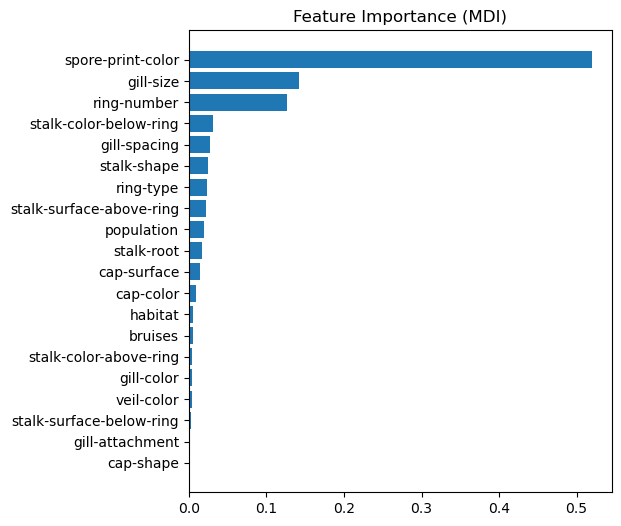

In [112]:
from sklearn.inspection import permutation_importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, test_X, test_y, n_repeats=10, random_state=42, n_jobs=2
)

In [113]:
col = 'spore-print-color'
df2 = new_df.loc[:, new_df.columns != col]
y = df['class']
col = 'class'
X = df2.loc[:, df2.columns != col]
df2

rem_X, test_X, rem_y, test_y = train_test_split(X,y, test_size=0.1, random_state=42, shuffle=True)
train_X, valid_X, train_y, valid_y = train_test_split(rem_X, rem_y, test_size=0.2)

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
import pickle as pk
model = GradientBoostingClassifier(verbose=1).fit(train_X, train_y)

      Iter       Train Loss   Remaining Time 
         1           1.2317            0.39s
         2           1.1058            0.28s
         3           1.0011            0.18s
         4           0.9130            0.14s
         5           0.8376            0.11s
         6           0.7725            0.28s
         7           0.7163            0.24s
         8           0.6671            0.21s
         9           0.6249            0.18s
        10           0.5868            0.16s
        20           0.3342            0.27s
        30           0.2055            0.23s
        40           0.1311            0.20s
        50           0.1027            0.16s
        60           0.0747            0.13s
        70           0.0537            0.10s
        80           0.0403            0.07s
        90           0.0302            0.03s
       100           0.0228            0.00s


In [115]:
model.score(valid_X, valid_y)

1.0

In [116]:
model.score(test_X, test_y)

1.0

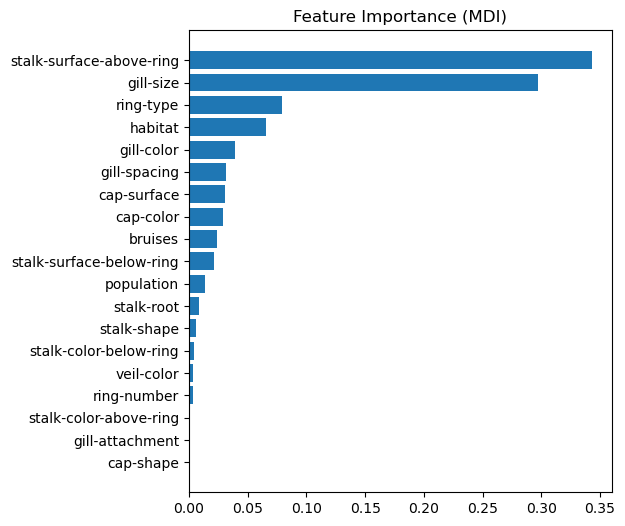

In [117]:
from sklearn.inspection import permutation_importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, test_X, test_y, n_repeats=10, random_state=42, n_jobs=2
)